# INFORMATION TO USER
The notebook is used to generate Figure 4 in the manuscript via the **Google Colab** platform


# Package Versions
Imported Libraries
- numpy: 1.18.5
- pandas: 1.0.5
- seaborn: 0.10.1
- matplotlib: 3.2.2

### Clone GitHub Repository
This is so we can access the raw data in the \*.csv files from the GitHib at https://github.com/oliver29063/MalariaDiagnosis.

In [4]:
! git clone https://github.com/oliver29063/MalariaDiagnosis

Cloning into 'MalariaDiagnosis'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 1105 (delta 21), reused 0 (delta 0), pack-reused 1055
Receiving objects: 100% (1105/1105), 4.20 MiB | 9.08 MiB/s, done.
Resolving deltas: 100% (317/317), done.


### Import Packages and Set Plot Specifications

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_style(style='whitegrid')

Optimizer Figures (Figures 4A-4F)

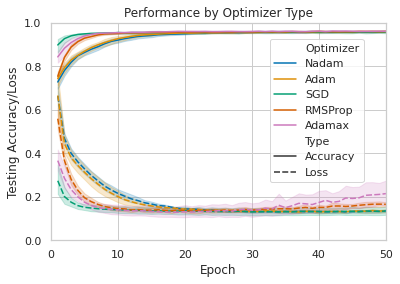

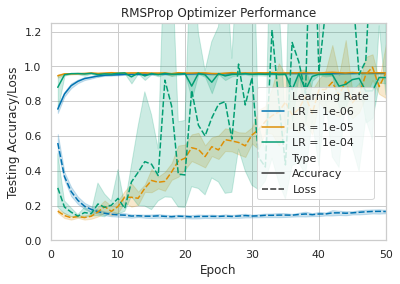

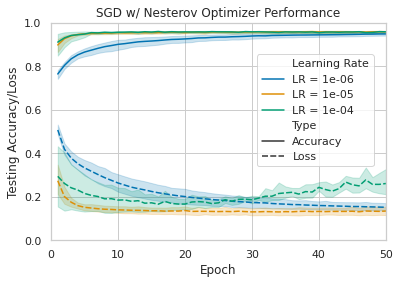

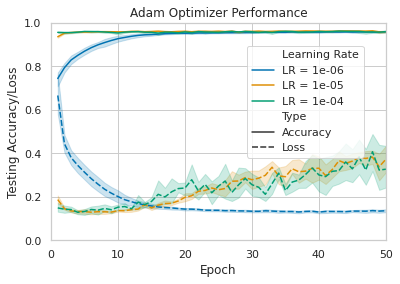

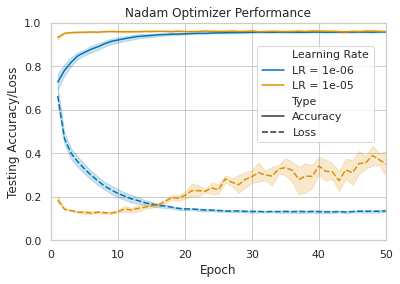

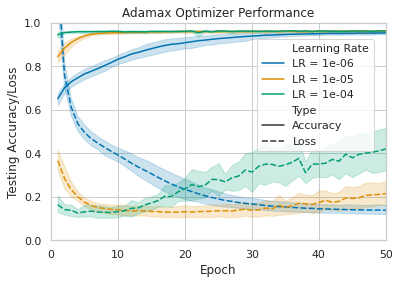

In [12]:
Optimizer = ['1e-06','1e-06','1e-05','1e-06','1e-05']
ModelList = ['Nadam','Adam','SGD','RMSProp','Adamax']

# Initialize variables and preallocate memory space
Epochs = 50
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,Epochs])
TestLosses = np.zeros([5*ModelCt,Epochs])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(ModelList[i])+'_'+str(Optimizer[i])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(ModelList[i])+'_'+str(Optimizer[i])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)

ModelLists = ModelList
Models = np.repeat(ModelLists, [250]*ModelCt, axis=0)

PerformanceData = {'Epoch': np.concatenate((Epochs,Epochs)), 'Measurement': np.concatenate((All_Accuracies, All_Losses)), 'Optimizer': np.concatenate((Models,Models)), 'Type': np.repeat(['Accuracy','Loss'], 250*ModelCt, axis=0)}
PerformanceDf = pd.DataFrame(data=PerformanceData)

sns.lineplot(x="Epoch", y="Measurement",hue="Optimizer", style="Type", data=PerformanceDf, palette="colorblind")
plt.title('Performance by Optimizer Type')
plt.ylabel('Testing Accuracy/Loss')
plt.xlabel('Epoch')
plt.xlim(0,50)
plt.ylim(0,1)
plt.legend(loc='upper right', bbox_to_anchor=(0.95,0.95))
plt.savefig('Figure4A.png', dpi = 600)
plt.show()




# RMSPROP OPTIMIZER
ModelList = ['1e-06','1e-05', '0.0001']
Optimizer = 'RMSProp'

# Initialize variables and preallocate memory space
Epochs = 50
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,Epochs])
TestLosses = np.zeros([5*ModelCt,Epochs])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)

ModelLists = ['LR = 1e-06','LR = 1e-05', 'LR = 1e-04']
Models = np.repeat(ModelLists, [250]*ModelCt, axis=0)

# PLOT RMSPROP OPTIMIZER PERFORMANCE
PerformanceData = {'Epoch': np.concatenate((Epochs,Epochs)), 'Measurement': np.concatenate((All_Accuracies, All_Losses)), 'Learning Rate': np.concatenate((Models,Models)), 'Type': np.repeat(['Accuracy','Loss'], 250*ModelCt, axis=0)}
PerformanceDf = pd.DataFrame(data=PerformanceData)

sns.lineplot(x="Epoch", y="Measurement",hue="Learning Rate", style="Type", data=PerformanceDf, palette="colorblind")
plt.title('RMSProp Optimizer Performance')
plt.ylabel('Testing Accuracy/Loss')
plt.xlabel('Epoch')
plt.xlim(0,50)
plt.ylim(0,1.25)
plt.legend(loc='upper right', bbox_to_anchor=(0.98,0.73))
plt.savefig('Figure4C.png', dpi = 600)
plt.show()

# SGD OPTIMIZER
ModelList = ['1e-06','1e-05', '0.0001']
Optimizer = 'SGD'

# Initialize variables and preallocate memory space
Epochs = 50
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,Epochs])
TestLosses = np.zeros([5*ModelCt,Epochs])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)

ModelLists = ['LR = 1e-06','LR = 1e-05', 'LR = 1e-04']
Models = np.repeat(ModelLists, [250]*ModelCt, axis=0)

# PLOT RMSPROP OPTIMIZER PERFORMANCE
PerformanceData = {'Epoch': np.concatenate((Epochs,Epochs)), 'Measurement': np.concatenate((All_Accuracies, All_Losses)), 'Learning Rate': np.concatenate((Models,Models)), 'Type': np.repeat(['Accuracy','Loss'], 250*ModelCt, axis=0)}
PerformanceDf = pd.DataFrame(data=PerformanceData)

sns.lineplot(x="Epoch", y="Measurement",hue="Learning Rate", style="Type", data=PerformanceDf, palette="colorblind")
plt.title('SGD w/ Nesterov Optimizer Performance')
plt.ylabel('Testing Accuracy/Loss')
plt.xlabel('Epoch')
plt.xlim(0,50)
plt.ylim(0,1)
plt.legend(loc='upper right', bbox_to_anchor=(0.98,0.88))
plt.savefig('Figure4B.png', dpi = 600)
plt.show()




# ADAM OPTIMIZER
ModelList = ['1e-06','1e-05', '0.0001']
Optimizer = 'Adam'

# Initialize variables and preallocate memory space
Epochs = 50
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,Epochs])
TestLosses = np.zeros([5*ModelCt,Epochs])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)

ModelLists = ['LR = 1e-06','LR = 1e-05', 'LR = 1e-04']
Models = np.repeat(ModelLists, [250]*ModelCt, axis=0)

# PLOT ADAM OPTIMIZER PERFORMANCE
PerformanceData = {'Epoch': np.concatenate((Epochs,Epochs)), 'Measurement': np.concatenate((All_Accuracies, All_Losses)), 'Learning Rate': np.concatenate((Models,Models)), 'Type': np.repeat(['Accuracy','Loss'], 250*ModelCt, axis=0)}
PerformanceDf = pd.DataFrame(data=PerformanceData)

sns.lineplot(x="Epoch", y="Measurement",hue="Learning Rate", style="Type", data=PerformanceDf, palette="colorblind")
plt.title('Adam Optimizer Performance')
plt.ylabel('Testing Accuracy/Loss')
plt.xlabel('Epoch')
plt.xlim(0,50)
plt.ylim(0,1)
plt.legend(loc='upper right', bbox_to_anchor=(0.95,0.92))
plt.savefig('Figure4D.png', dpi = 600)
plt.show()

# NADAM OPTIMIZER
ModelList = ['1e-06','1e-05']
Optimizer = 'Nadam'

# Initialize variables and preallocate memory space
Epochs = 50
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,Epochs])
TestLosses = np.zeros([5*ModelCt,Epochs])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)

ModelLists = ['LR = 1e-06','LR = 1e-05']
Models = np.repeat(ModelLists, [250]*ModelCt, axis=0)

# PLOT RMSPROP OPTIMIZER PERFORMANCE
PerformanceData = {'Epoch': np.concatenate((Epochs,Epochs)), 'Measurement': np.concatenate((All_Accuracies, All_Losses)), 'Learning Rate': np.concatenate((Models,Models)), 'Type': np.repeat(['Accuracy','Loss'], 250*ModelCt, axis=0)}
PerformanceDf = pd.DataFrame(data=PerformanceData)

sns.lineplot(x="Epoch", y="Measurement",hue="Learning Rate", style="Type", data=PerformanceDf, palette="colorblind")
plt.title('Nadam Optimizer Performance')
plt.ylabel('Testing Accuracy/Loss')
plt.xlabel('Epoch')
plt.xlim(0,50)
plt.ylim(0,1)
plt.legend(loc='upper right', bbox_to_anchor=(0.98,0.92))
plt.savefig('Figure4E.png', dpi = 600)
plt.show()




# ADAMAX OPTIMIZER
ModelList = ['1e-06','1e-05','0.0001']
Optimizer = 'Adamax'

# Initialize variables and preallocate memory space
Epochs = 50
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,Epochs])
TestLosses = np.zeros([5*ModelCt,Epochs])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/Optimizers/'+str(Optimizer)+'_'+str(ModelList[i])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)

ModelLists = ['LR = 1e-06','LR = 1e-05','LR = 1e-04']
Models = np.repeat(ModelLists, [250]*ModelCt, axis=0)

# PLOT RMSPROP OPTIMIZER PERFORMANCE
PerformanceData = {'Epoch': np.concatenate((Epochs,Epochs)), 'Measurement': np.concatenate((All_Accuracies, All_Losses)), 'Learning Rate': np.concatenate((Models,Models)), 'Type': np.repeat(['Accuracy','Loss'], 250*ModelCt, axis=0)}
PerformanceDf = pd.DataFrame(data=PerformanceData)

sns.lineplot(x="Epoch", y="Measurement",hue="Learning Rate", style="Type", data=PerformanceDf, palette="colorblind")
plt.title('Adamax Optimizer Performance')
plt.ylabel('Testing Accuracy/Loss')
plt.xlabel('Epoch')
plt.xlim(0,50)
plt.ylim(0,1)
plt.legend(loc='upper right', bbox_to_anchor=(0.98,0.95))
plt.savefig('Figure4F.png', dpi = 600)
plt.show()

### Batch Size Figures (Figures 4G and 4H)

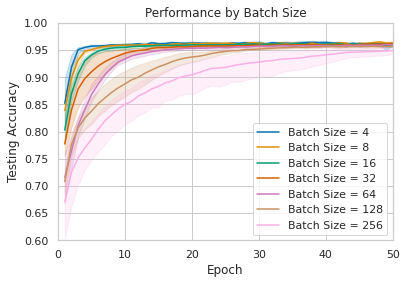

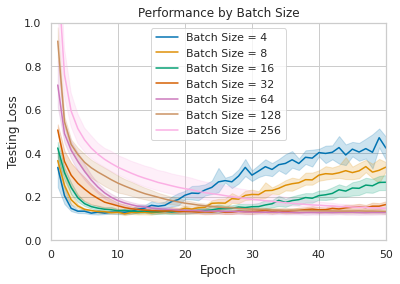

In [5]:
ModelList = ['N4','N8','N16','N32','N64','N128','N256']

# Initialize variables and preallocate memory space
Epochs = 50
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,Epochs])
TestLosses = np.zeros([5*ModelCt,Epochs])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/BatchSize/'+str(ModelList[i][1:])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/BatchSize/'+str(ModelList[i][1:])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)

ModelLists = ['Batch Size = 4','Batch Size = 8','Batch Size = 16','Batch Size = 32','Batch Size = 64','Batch Size = 128','Batch Size = 256']
Models = np.repeat(ModelLists, [250]*ModelCt, axis=0)

# Set up DataFrame for testing accuracy and testing loss
AccuracyPerformanceData = {'Epoch': Epochs, 'Testing Accuracy': All_Accuracies, 'Model': Models}
AccuracyPerformanceDf = pd.DataFrame(data=AccuracyPerformanceData)

LossPerformanceData = {'Epoch': Epochs, 'Testing Loss': All_Losses, 'Model': Models}
LossPerformanceDf = pd.DataFrame(data=AccuracyPerformanceData)
sns.set_style(style='whitegrid')
# Print plots 
plt.figure(1)
AccuracyPerformancePlt = sns.lineplot(x="Epoch", y="Testing Accuracy", hue="Model", data=AccuracyPerformanceData, palette="colorblind")
plt.title('Performance by Batch Size')
plt.ylabel('Testing Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.6,1) 
plt.xlim(0,50)
plt.savefig('Figure4G.png', dpi = 600)
plt.show()

plt.figure(3)
LossPerformancePlt = sns.lineplot(x="Epoch", y="Testing Loss", hue="Model", data=LossPerformanceData, palette="colorblind")
plt.title('Performance by Batch Size')
plt.ylabel('Testing Loss')
plt.xlabel('Epoch')
plt.ylim(0,1) 
plt.xlim(0,50)
plt.savefig('Figure4H.png', dpi = 600)
plt.show()